In [1]:
import geopandas
from matplotlib import colors
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import geohash
import numpy as np
import cartopy.crs as ccrs
import pandas as pd

In [47]:
gsdata_satnog = pd.read_csv("data/gsdata/gsdata_satnog.csv")

# https://www.ksat.no/ground-network-services/the-ksat-global-ground-station-network/
# Accessed: 2023-03-08
gsdata_ksat   = pd.read_csv("data/gsdata/gsdata_ksat.csv")

# https://atlasground.com/wp-content/uploads/2022/12/WEB-120522-Antenna-Network-Map.pdf
# Accessed: 2023-03-09
gsdata_atlas  = pd.read_csv("data/gsdata/gsdata_atlas.csv")

# https://leaf.space/
# Accessed: 2023-03-09
gsdata_leaf   = pd.read_csv("data/gsdata/gsdata_leaf.csv")

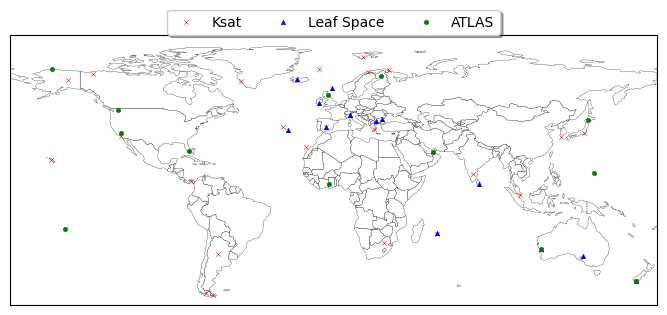

In [58]:
continents = ["AF", "AS", "EU", "NA", "OC", "SA"]
cols = ["#c1d5e2", "#ce9c7f", "#7598b6", "#6a7465", "#914c09", "#663979", "#fbe17b"]

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#world = world[(world.name!="Antarctica")]

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2, linewidth=0.0 ))


fig, ax = plt.subplots(figsize=(7, 3), subplot_kw={'projection': ccrs.PlateCarree()})

cmap = colors.ListedColormap(cols[:-2])
world.plot(facecolor = "white", edgecolor="black", ax=ax, linewidth=0.2)

# Plotting GS points
def plot_gsdata(gsdata_df, ax, label, marker, color):
    latitude, longitude = gsdata_df["lat"], gsdata_df["long"]
    ax.scatter(longitude, latitude,
               sizes = [10],
               color=color,
               zorder = 10,
               marker=marker,
               linewidth = 0.4,
               label=label)

plot_gsdata(gsdata_ksat, ax, "Ksat", "x", "red")
plot_gsdata(gsdata_leaf, ax, "Leaf Space", "^", "blue")
plot_gsdata(gsdata_atlas, ax, "ATLAS", "o", "green")
    
ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("mlab_availabilitynprobes.pdf", pad_inches=0)

#plt.legend(loc = "lower left")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True, shadow=True)
plt.show()